##### Emily Lai: Shopify Technical Challenge Submission


## Question 1:

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

#### a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

While sneakers are typically thought of as an affordable item, this overlooks the possibility of large orders of sneakers, or particular shops that are selling sneakers with a Unique Selling Point (USP), such as ones previously worn by celebrities. We should keep this in mind when performing analysis on this dataset.

There are also four general statistical measures of data: mean, median, mode, and range. In this case, taking the median seems promising since outliers are a likely culprit.
______

#### b) What metric would you report for this dataset?

As described above, a median could be interesting to look at. To make sure, let's hop into some analysis!

In [1]:
# Data analysis and visualization libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Importing a csv version of the provided dataset
data = pd. read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

In [4]:
# Summary statistics
# The max order_amount is significantly above the 3rd quartile value--looks like an outlier
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
order_id,5000.0,2500.5000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
shop_id,5000.0,50.0788,29.006118,1.0,24.00,50.0,75.00,100.0
user_id,5000.0,849.0924,87.798982,607.0,775.00,849.0,925.00,999.0
order_amount,5000.0,3145.1280,41282.539349,90.0,163.00,284.0,390.00,704000.0
total_items,5000.0,8.7872,116.320320,1.0,1.00,2.0,3.00,2000.0


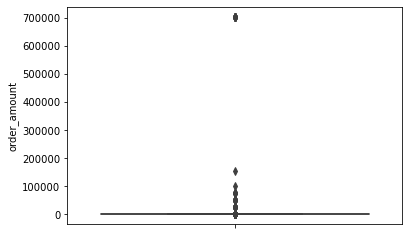

In [5]:
# Visualizing the dataset with a boxplot
# The box appears completely flattened due to outliers
sns.boxplot(y='order_amount', data=data)

In [6]:
# Do these outliers make up a significant portion of the data?
# Upper outliers: Q3 + 1.5 * IQR
iqr = 390 - 163 # Q3 - Q1; InterQuartile Range
upper_outlier_start = 390 + (1.5 * iqr)
print(data[data['order_amount'] > upper_outlier_start])

      order_id  shop_id  user_id  order_amount  total_items payment_method  \
15          16       42      607        704000         2000    credit_card   
60          61       42      607        704000         2000    credit_card   
99         100       18      752           780            5           cash   
136        137       15      961           765            5    credit_card   
160        161       78      990         25725            1    credit_card   
...        ...      ...      ...           ...          ...            ...   
4918      4919       78      823         25725            1           cash   
4927      4928       74      849           765            5           cash   
4952      4953       26      786           880            5           cash   
4958      4959       70      711           865            5    credit_card   
4980      4981       50      942           772            4    credit_card   

               created_at  
15     2017-03-07 4:00:00  
60     

<b>We can see that there are 141 rows of upper outliers, 2.82% of the dataset. This makes up an insignificant part of the data, thus a median is viable.</b>
_______

#### c) What is its value?

This can be calculated using the pandas median function.

In [8]:
print(f"Order amount median: ${data['order_amount'].median()}")

Order amount median: $284.0


A median of $284 is more reflective of the dataset. We could use this number for a variety of applications, such as offering VIP status to customers who spend more than it to promote brand loyalty. Furthermore, it can be used to see which stores are over- and underperforming, in which advertising dollars can be allocated accordingly.

There are also applications in fraud detection -- some extreme outliers with concerning order amounts, such as user_id 607, could have had their Shopify account or credit card information stolen and used to purchase obscene amounts of $352 shoes.